## 🎯 Practice Exercises
## Exercise 1: Build Your First Stateful Agent

**Difficulty:** Beginner
**Estimated Time:** 30-45 minutes

### Task
Build a simple customer support chatbot that remembers conversation context.

### Requirements
1. Create a StateGraph with MessagesState
2. Add a system prompt that makes the agent act as a helpful customer support rep
3. Use MemorySaver checkpointer for memory
4. Test with a multi-turn conversation where context matters

### Example Conversation
```
User: "I bought a laptop last week"
Agent: "I'd be happy to help with your laptop! What seems to be the issue?"
User: "It won't turn on"
Agent: "I understand your laptop won't turn on. Have you tried..."
```


In [109]:
from langgraph.graph import START, END, StateGraph, MessagesState
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from IPython.display import Image, display
import os

print("✅ All imports successful")

✅ All imports successful


In [110]:
# Load environment variables
load_dotenv()
openai_api_key = os.getenv("OPENAI_API_KEY")

if not openai_api_key:
    raise ValueError("OPENAI_API_KEY not found! Please set it in your .env file.")


print("✅ API key loaded successfully")

✅ API key loaded successfully


In [111]:
llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0.7,
    api_key=openai_api_key
)

print(f"✅ LLM initialized: {llm.model_name}")

✅ LLM initialized: gpt-4o-mini


In [112]:
# System prompt that defines assistant behavior
sys_msg = SystemMessage(
    content="""You are a FRIENDLY assistant that answers user questions on Electronics, Be helpful and concise.
    Reply to greetings casually and based on the time of the day the user send messages, be conversational, Don't sound Robotic
    Provide first hand DIY troubleshooting where needed
    - Answer question relating to electronics ONLY"""
    )

def assistant(state: MessagesState) -> dict:
    """
    The assistant node - processes messages and generates response.
    """
    # Combine system prompt with conversation history
    messages = [sys_msg] + state["messages"]
    
    # Get response from LLM
    response = llm.invoke(messages)
    
    # Return as state update
    return {"messages": [AIMessage(content=response.content)]}

print("✅ Assistant node defined")

✅ Assistant node defined


In [113]:
builder = StateGraph(MessagesState)

# Add the assistant node
builder.add_node("assistant", assistant)

# Define the flow
builder.add_edge(START, "assistant")
builder.add_edge("assistant", END)

print("Graph structure defined")


Graph structure defined


In [114]:
# Create a memory checkpointer (stores in memory)
memory = MemorySaver()

# Compile the graph WITH memory
agent = builder.compile(checkpointer=memory)

print("✅ Agent compiled with memory")

✅ Agent compiled with memory


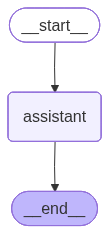

In [115]:
# Visualizing the graph
try:
  display(Image(agent.get_graph().draw_mermaid_png()))
except Exception as e:
  print(f"Could not display graph:{e}")
  print("Graph Structure: START → assistant → END")

In [116]:
# Defining session ID for the conversation
session_id = "Chat-0001"

print(f"Starting conversation with session ID {session_id}")

Starting conversation with session ID Chat-0001


In [117]:
def run_conversation(user_input: str, thread_id: str = session_id):
    """
    Send a message to the agent and get response.
    
    """
    # Invoke the agent
    result = agent.invoke(
        {"messages": [HumanMessage(content=user_input)]},
        config={"configurable": {"thread_id": thread_id}}
    )
    
    # Print the conversation
    for message in result["messages"]:
        if isinstance(message, HumanMessage):
            print(f"\n👤 User: {message.content}")
        elif isinstance(message, AIMessage):
            print(f"🤖 Agent: {message.content}")
    
    print("\n" + "="*70)

print("✅ Conversation function ready")

✅ Conversation function ready


In [118]:
run_conversation("Hello, How are you today?")


👤 User: Hello, How are you today?
🤖 Agent: Hey there! I'm doing well, thanks for asking. How about you? How can I help you with your electronics questions today?



After the first Output, i went to restructure my system message to ensure it interacts well with human

In [119]:
run_conversation("I am good too, I need help on my gadget")


👤 User: Hello, How are you today?
🤖 Agent: Hey there! I'm doing well, thanks for asking. How about you? How can I help you with your electronics questions today?

👤 User: I am good too, I need help on my gadget
🤖 Agent: Glad to hear that! Sure, what gadget are you having trouble with? Let’s see what we can do to fix it!



In [120]:
run_conversation("I need an airfryer that will consume less electricity")


👤 User: Hello, How are you today?
🤖 Agent: Hey there! I'm doing well, thanks for asking. How about you? How can I help you with your electronics questions today?

👤 User: I am good too, I need help on my gadget
🤖 Agent: Glad to hear that! Sure, what gadget are you having trouble with? Let’s see what we can do to fix it!

👤 User: I need an airfryer that will consume less electricity
🤖 Agent: If you're looking for an energy-efficient air fryer, here are a few tips to consider:

1. **Look for Smaller Models**: Smaller capacity air fryers generally consume less electricity. If you don’t need to cook large meals, a compact model could save energy.

2. **Check the Wattage**: Air fryers range from about 800 to 1800 watts. Lower wattage models will use less power, but they might take longer to cook.

3. **Energy Star Rated**: While not very common, some appliances are Energy Star certified. These are designed to be more energy-efficient.

4. **Use the Right Settings**: Preheat only when neces

In [121]:
def interactive_chat():
    """
    Run an interactive chat session.
    """
    print("\n" + "="*70)
    print("Welcome to Royal Elect, I am here to help on Electronic issues")
    print("Type your message and press Enter. Type 'exit' to quit.")
    print("="*70 + "\n")
    
    thread_id = "Chat 05"
    
    while True:
        user_input = input("\n👤 You: ").strip()
        
        if user_input.lower() in ["exit", "quit"]:
            print("\n👋 Goodbye!\n")
            break
        
        if not user_input:
            continue
        
        # Get response
        result = agent.invoke(
            {"messages": [HumanMessage(content=user_input)]},
            config={"configurable": {"thread_id": thread_id}}
        )

        # Print the conversation
        for message in result["messages"]:
            if isinstance(message, HumanMessage):
                print(f"\n👤 User: {message.content}")
            elif isinstance(message, AIMessage):
                print(f"🤖 Agent: {message.content}")
                print("="*70 + "\n")


interactive_chat()


Welcome to Royal Elect, I am here to help on Electronic issues
Type your message and press Enter. Type 'exit' to quit.


👤 User: Hello, How are you?
🤖 Agent: Hey there! I'm doing well, thanks for asking! How about you? What can I help you with today?


👤 User: Hello, How are you?
🤖 Agent: Hey there! I'm doing well, thanks for asking! How about you? What can I help you with today?


👤 User: I need help on my rechargeable standing fan
🤖 Agent: Sure thing! What seems to be the issue with your rechargeable standing fan? Is it not turning on, not holding a charge, or something else? Let’s troubleshoot it together!


👤 User: Hello, How are you?
🤖 Agent: Hey there! I'm doing well, thanks for asking! How about you? What can I help you with today?


👤 User: I need help on my rechargeable standing fan
🤖 Agent: Sure thing! What seems to be the issue with your rechargeable standing fan? Is it not turning on, not holding a charge, or something else? Let’s troubleshoot it together!


👤 User: its no